In [1]:
import pandas as pd
df = pd.read_csv('mail_data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df.shape

(5572, 2)

In [3]:
# checking the presence of null values  ---no null values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [4]:
#As we can observe message have categorical variables to convert these to binaries i'm using label encoder
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

In [5]:
df['Category'] = label_enc.fit_transform(df['Category'])

#printing the first five spam's
df[df['Category']==1].head()

,Category,Message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."


In [6]:
df.Category.value_counts()

0    4825
1     747
Name: Category, dtype: int64

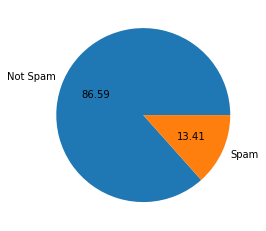

In [7]:
#visualizing in pie chart, we can also use donut,bar chart,countplot(sns)
import matplotlib.pyplot as plt
plt.pie(df.Category.value_counts(),labels= ['Not Spam','Spam'],autopct='%0.2f')
plt.show()

#Observation: we can observe that there is sightly imbalanced,this imbalanced creates a difference in scores(for prediciting spam's)

<AxesSubplot:>

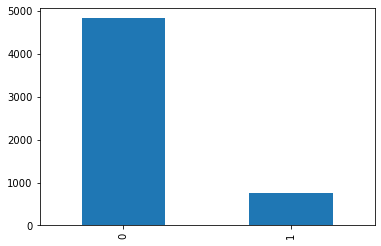

In [8]:
df.Category.value_counts().plot(kind='bar')

---Now we are finding no of characters, words and sentences in message column.

->Why we have to do that?
  --To perform 'EDA', which is used to understand the data and distribution. we cant perform any eda on directly on sentences.

In [9]:
import nltk

In [10]:
#creating new and storing the number of characters in message
df['no_of_characters '] = df['Message'].apply(len)
df.head()

,Category,Message,no_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
#finding the number of words
from nltk.tokenize import word_tokenize
df['no_of_words']=df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [12]:
df.head()

,Category,Message,no_of_characters,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [13]:
#no of sentences
df['no_of_sentences'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [14]:
df.head()

,Category,Message,no_of_characters,no_of_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [15]:
#some basic stats distribution
df[df['Category']==0].describe()

,Category,no_of_characters,no_of_words,no_of_sentences
count,4825.0,4825.000000,4825.000000,4825.000000
mean,0.0,71.448290,17.424663,1.840415
std,0.0,58.434864,14.113530,1.452475
min,0.0,2.000000,1.000000,1.000000
25%,0.0,33.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,93.000000,23.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [16]:
df[df['Category']==1].describe()

,Category,no_of_characters,no_of_words,no_of_sentences
count,747.0,747.000000,747.000000,747.000000
mean,1.0,137.989290,27.878179,3.028112
std,0.0,29.980287,7.036282,1.552655
min,1.0,7.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,223.000000,46.000000,9.000000


plt.figure(10,5)
plt.histplot(df[df['Message']==0][no_of_characters])
plt.histplot(df[df['Message']==1][no_of_characters],color='grey')

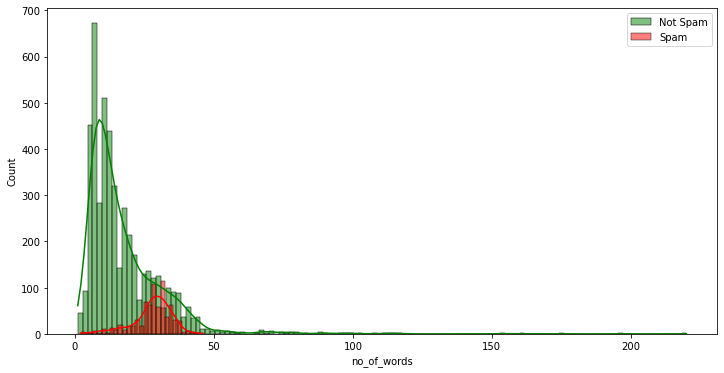

In [17]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(data= df[df['Category']==0], x="no_of_words", color="green", label="Not Spam", kde=True)
sns.histplot(data= df[df['Category']==1], x="no_of_words", color="red", label="Spam", kde=True)
plt.legend() 
plt.show()

#this is an right skewed distribution 

<Figure size 864x432 with 0 Axes>

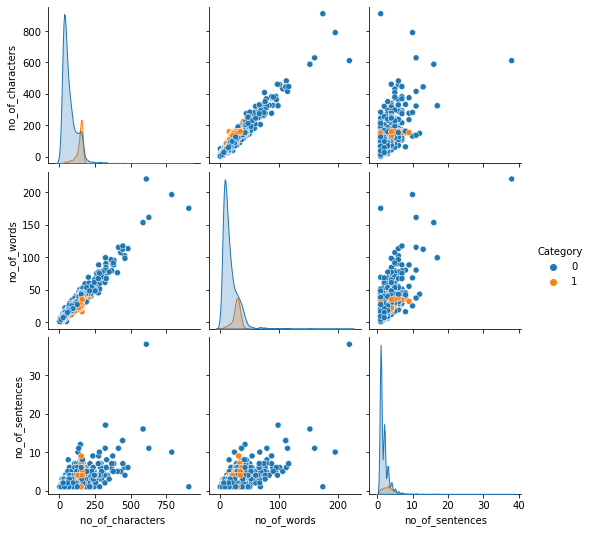

In [18]:
plt.figure(figsize=(12,6))
sns.pairplot(df, hue ='Category')
plt.show()

#observation:the no of characters and words form right skewed distribution

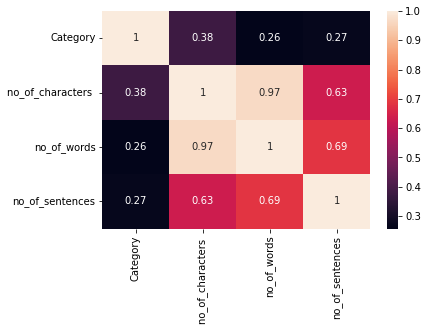

In [19]:
#correlation
plt.figure()
sns.heatmap(data=df.corr(),annot=True)
plt.show()

# Text preprocessing

In [20]:
from collections import Counter
from nltk.corpus import stopwords

In [21]:
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [22]:
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text) #seprating each word
    l = []
    for i in text:
        if i.isalnum():
            l.append(i) #considering only alphabets and numbers
    
    text = l[:]
    l.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            l.append(i)
            
    text = l[:]
    l.clear()        
    for i in text:
        l.append(ps.stem(i)) #applying stemming
    
    return " ".join(l)

#example of function text_transform
text_transform('I like solving ML problems but NLP is entertaining ')

'like solv ml problem nlp entertain'

In [23]:
#applying transformation to all messages
df['transformed_text']= df['Message'].apply(text_transform)
df.head(5)

,Category,Message,no_of_characters,no_of_words,no_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Converting into Vectors

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500)

In [26]:
#here iam converting text to vectors
X = tfidf.fit_transform(df['Message']).toarray()
y=df.Category

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25 ,random_state=101, stratify=y)

In [28]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB(alpha=0.11001)
nb.fit(X_train,y_train)

MultinomialNB(alpha=0.11001)

In [29]:
y_pred = nb.predict(X_test)

print(classification_report(y_test,y_pred))
print('\n\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1206
           1       0.99      0.93      0.96       187

    accuracy                           0.99      1393
   macro avg       0.99      0.96      0.97      1393
weighted avg       0.99      0.99      0.99      1393




[[1204    2]
 [  14  173]]


In [32]:
print(accuracy_score(y_test,y_pred))

0.9885139985642498


In [31]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(nb,open('model.pkl','wb'))

# Code for Streamlit

In [ ]:
import streamlit as st
import pickle
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
#string.punctuation


def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text) #seprating each word
    l = []
    for i in text:
        if i.isalnum():
            l.append(i) #considering only alphabets and numbers
    
    text = l[:]
    l.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            l.append(i)
            
    text = l[:]
    l.clear()        
    for i in text:
        l.append(ps.stem(i)) #applying stemming
    
    return " ".join(l)

tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))
st.title("Email Spam Or HAm Classifier")

input_sms = st.text_area("Enter the message")

if st.button('Predict'):
    #preprcoessing
    transformed_sms = text_transform(input_sms)
    
    #converting into vectors
    vector_input = tfidf.transform([transformed_sms])
    
    #result
    result = model.predict(vector_input)[0]
    
    if result == 1:
        st.header("Spam Detected")
    else:
        st.header("No Spam Detected")
